# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# added json import to pull examples from the API
import json
# will most likely change scipy.stats to import st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print("The cities list is just for me to test from.")
pprint(cities)

#Am I supposed to get 600 cities? I only get 1000 pings per day wit the API. 


Number of cities in the list: 607
The cities list is just for me to test from.
['grytviken',
 'adamstown',
 'aljezur',
 'bilibino',
 'mana',
 'atafu village',
 'blackmans bay',
 'ilulissat',
 'papao',
 'klyuchi',
 'port-aux-francais',
 'fenoarivo be',
 'georgetown',
 'luanda',
 'bethel',
 'lihue',
 'pitea',
 'port elizabeth',
 'petrosino',
 'saipan',
 'bajna',
 'bredasdorp',
 'nadi',
 'tidjikja',
 'okhotsk',
 'walvis bay',
 'jamestown',
 'dunaivtsi',
 'anadyr',
 'patong',
 "'ohonua",
 'margaret river',
 'ushuaia',
 'karasuk',
 'fontanelas',
 'callao',
 'enewetak',
 'bandarbeyla',
 'likasi',
 'haiku-pauwela',
 'carnarvon',
 'saint-pierre',
 'polyarnyy',
 "st. john's",
 'fale old settlement',
 'mastic beach',
 'waitangi',
 'coron',
 'mufumbwe',
 'yellowknife',
 'amga',
 'black river',
 'obo',
 'sarayonu',
 'nemuro',
 'ciudad acuna',
 'constantia',
 'shingu',
 'peace river',
 'isangel',
 'zag',
 'ancud',
 'wailua homesteads',
 'west island',
 'sao felix do xingu',
 'bengkulu',
 'tupiza',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Making sure I am starting this right, and testing pulls. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"
test_city = np.random.choice(cities)

# Build query URL
query_url = url + "&appid=" + weather_api_key + "&q=" + test_city

# print(requests.get(query_url))
# Response 200 means that the request was successful

response = requests.get(query_url).json()
pprint(json.dumps(response, indent=4, sort_keys=True))

('{\n'
 '    "base": "stations",\n'
 '    "clouds": {\n'
 '        "all": 90\n'
 '    },\n'
 '    "cod": 200,\n'
 '    "coord": {\n'
 '        "lat": 52.9306,\n'
 '        "lon": 158.4028\n'
 '    },\n'
 '    "dt": 1715046000,\n'
 '    "id": 2118647,\n'
 '    "main": {\n'
 '        "feels_like": -1.33,\n'
 '        "grnd_level": 1022,\n'
 '        "humidity": 81,\n'
 '        "pressure": 1024,\n'
 '        "sea_level": 1024,\n'
 '        "temp": 1.63,\n'
 '        "temp_max": 7.15,\n'
 '        "temp_min": 1.63\n'
 '    },\n'
 '    "name": "Vilyuchinsk",\n'
 '    "sys": {\n'
 '        "country": "RU",\n'
 '        "id": 2088272,\n'
 '        "sunrise": 1715017338,\n'
 '        "sunset": 1715072614,\n'
 '        "type": 2\n'
 '    },\n'
 '    "timezone": 43200,\n'
 '    "visibility": 10000,\n'
 '    "weather": [\n'
 '        {\n'
 '            "description": "overcast clouds",\n'
 '            "icon": "04d",\n'
 '            "id": 804,\n'
 '            "main": "Clouds"\n'
 '        }\n'

In [6]:
#My trials to get the data from the API

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# "&appid=" + weather_api_key +

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | aljezur
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | papao
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | fenoarivo be
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | luanda
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | pitea
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | petrosino
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | bajna
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | na

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.18,84,64,4.25,GS,1715046292
1,adamstown,-25.0660,-130.1015,21.91,77,60,8.60,PN,1715046292
2,aljezur,37.3191,-8.8033,11.67,85,6,5.02,PT,1715046014
3,bilibino,68.0546,166.4372,-1.26,88,85,1.40,RU,1715046014
4,mana,5.6592,-53.7767,26.40,89,100,3.69,GF,1715046292


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.18,84,64,4.25,GS,1715046292
1,adamstown,-25.0660,-130.1015,21.91,77,60,8.60,PN,1715046292
2,aljezur,37.3191,-8.8033,11.67,85,6,5.02,PT,1715046014
3,bilibino,68.0546,166.4372,-1.26,88,85,1.40,RU,1715046014
4,mana,5.6592,-53.7767,26.40,89,100,3.69,GF,1715046292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

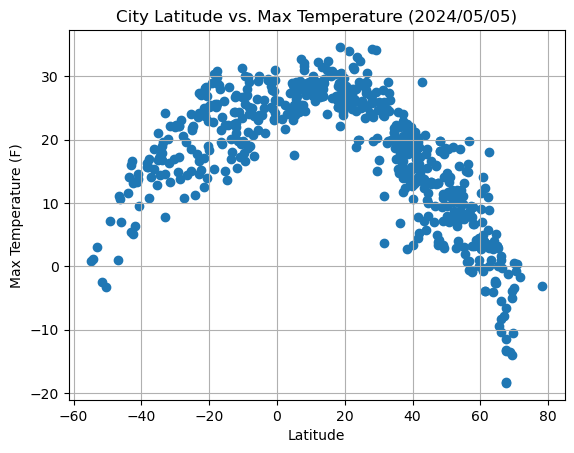

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

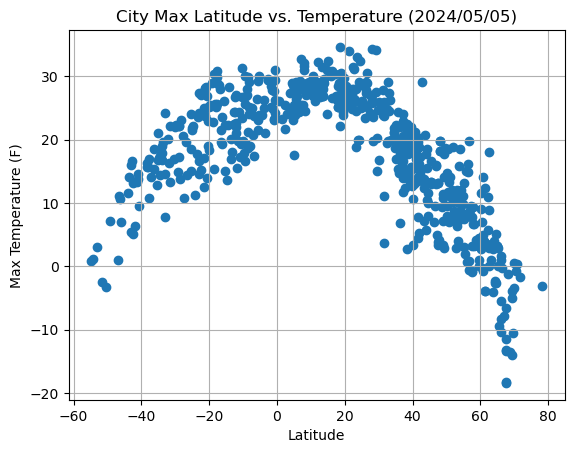

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

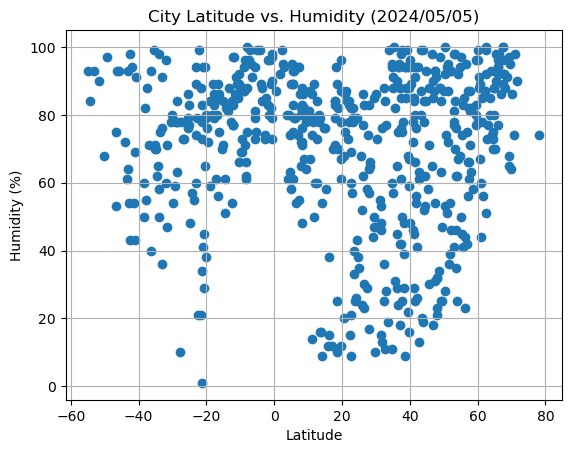

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

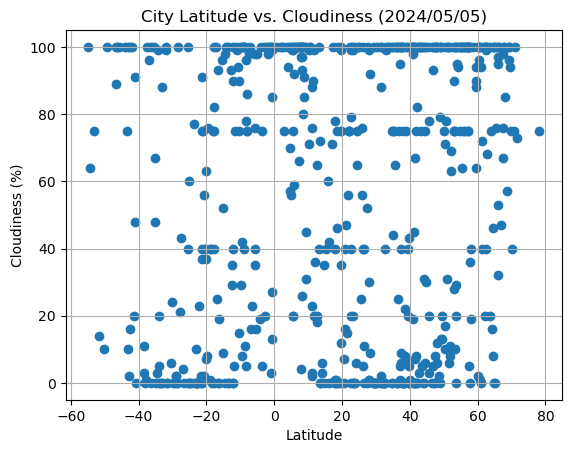

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

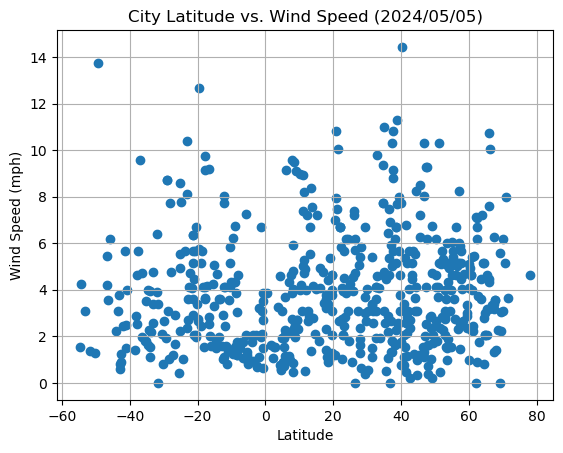

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aljezur,37.3191,-8.8033,11.67,85,6,5.02,PT,1715046014
3,bilibino,68.0546,166.4372,-1.26,88,85,1.40,RU,1715046014
4,mana,5.6592,-53.7767,26.40,89,100,3.69,GF,1715046292
7,ilulissat,69.2167,-51.1000,-4.99,68,100,0.00,GL,1715046015
9,klyuchi,52.2667,79.1667,8.75,46,63,5.31,RU,1715046015


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.18,84,64,4.25,GS,1715046292
1,adamstown,-25.0660,-130.1015,21.91,77,60,8.60,PN,1715046292
5,atafu village,-8.5421,-172.5159,29.93,71,11,3.85,TK,1715046292
6,blackmans bay,-43.0167,147.3167,15.96,64,10,0.80,AU,1715046015
8,papao,-17.7500,-149.5500,30.82,84,100,9.75,PF,1715046293


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7570260949837939


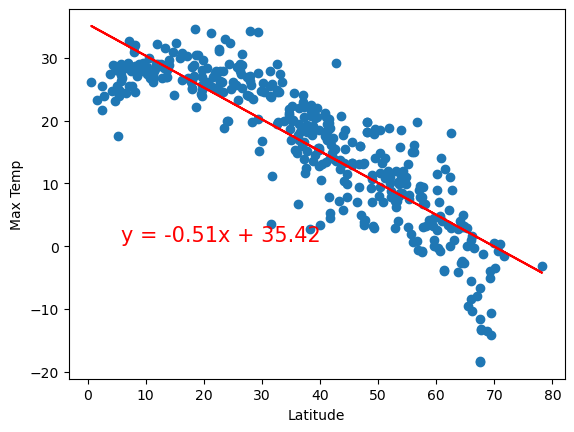

In [28]:
# Linear regression on Northern Hemisphere
# .stats is the library, then you need a function. in this case we are using linregress
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5638635020050374


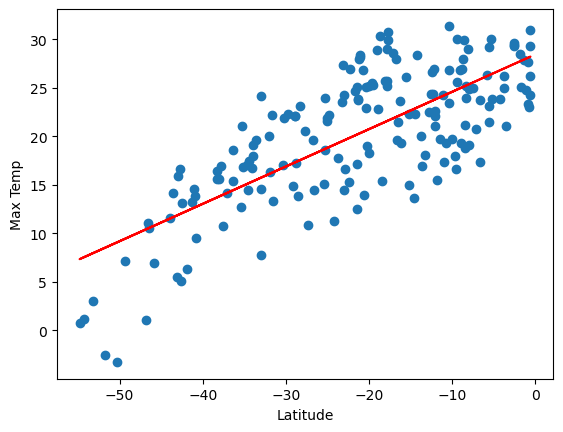

In [30]:
# Linear regression on Southern Hemisphere
# .stats is the library, then you need a function. in this case we are using linregress
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# I NEED TO DO THIS STILL !!! !! ! ! !! 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.015472155860686662


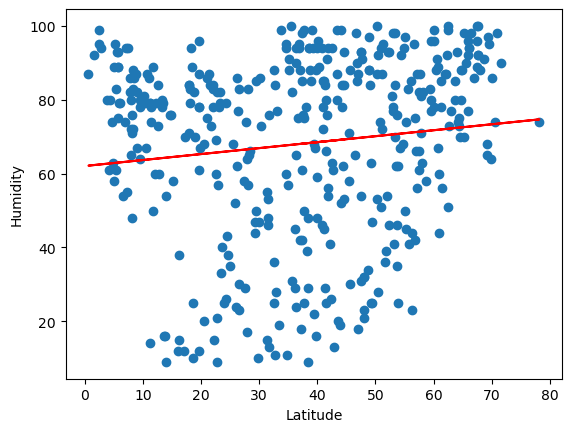

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04782137718441878


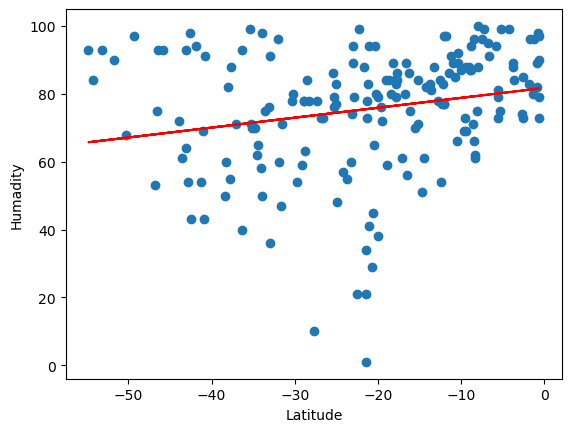

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


!!! ! I need to do THIS !!!! !  ! ! ! ! !! !

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.015472155860686662


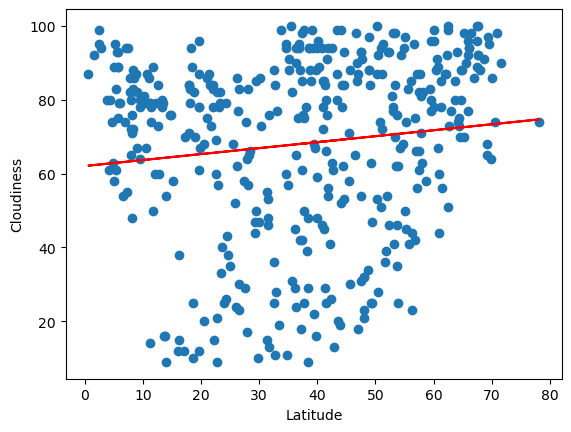

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.017008608823130007


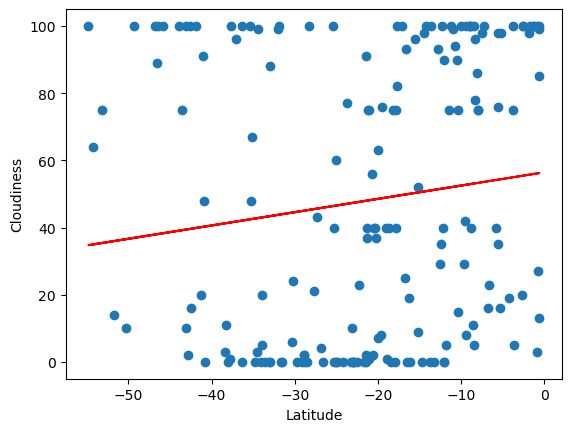

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015472155860686662


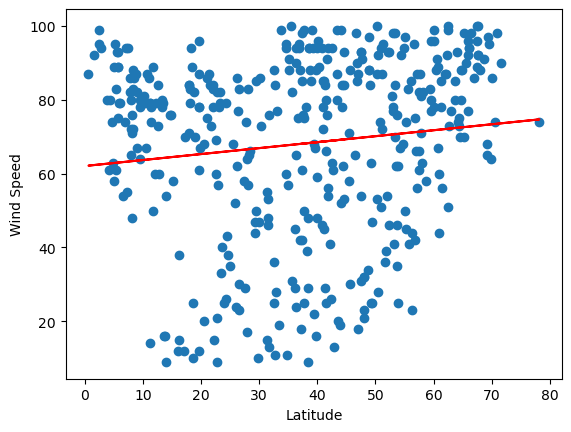

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.015472155860686662


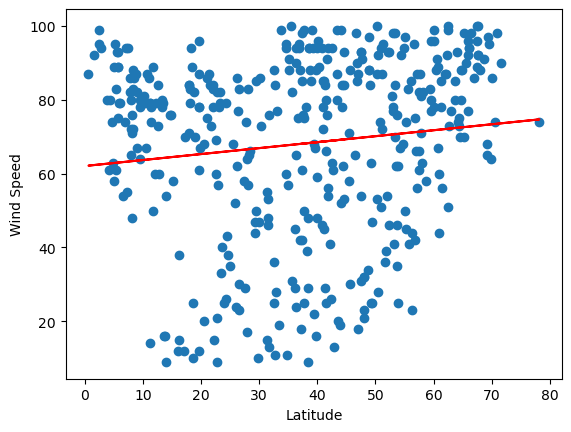

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE